Training for OR gate with ReLU...


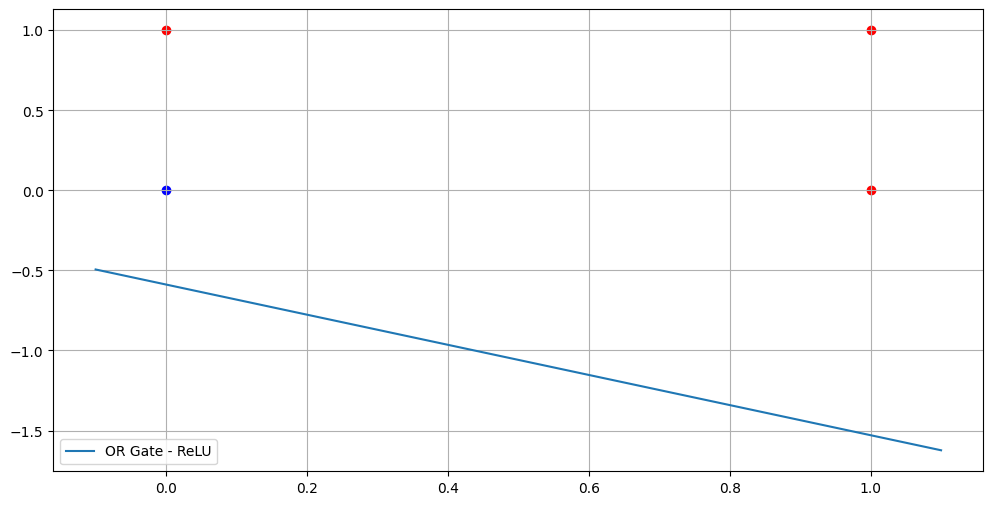

Training for OR gate with Sigmoid...


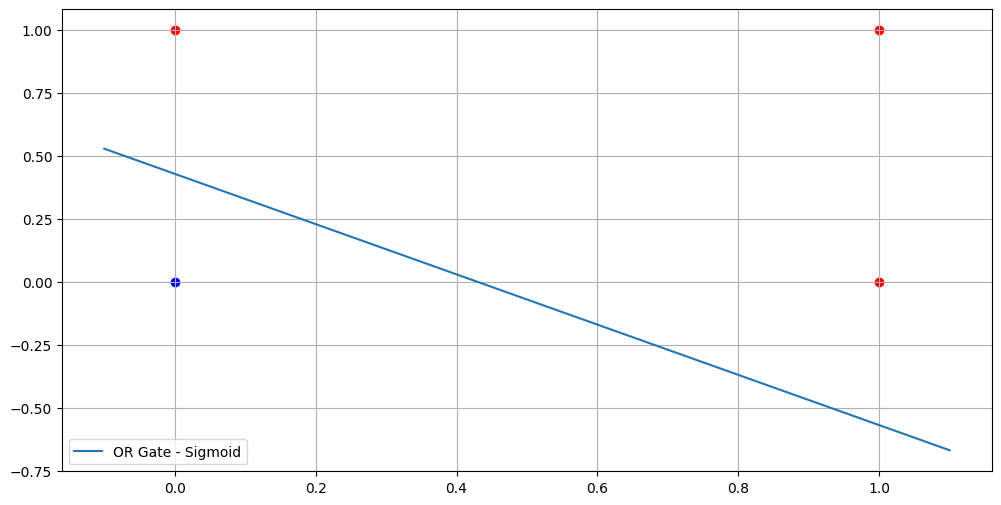

Training for AND gate with ReLU...


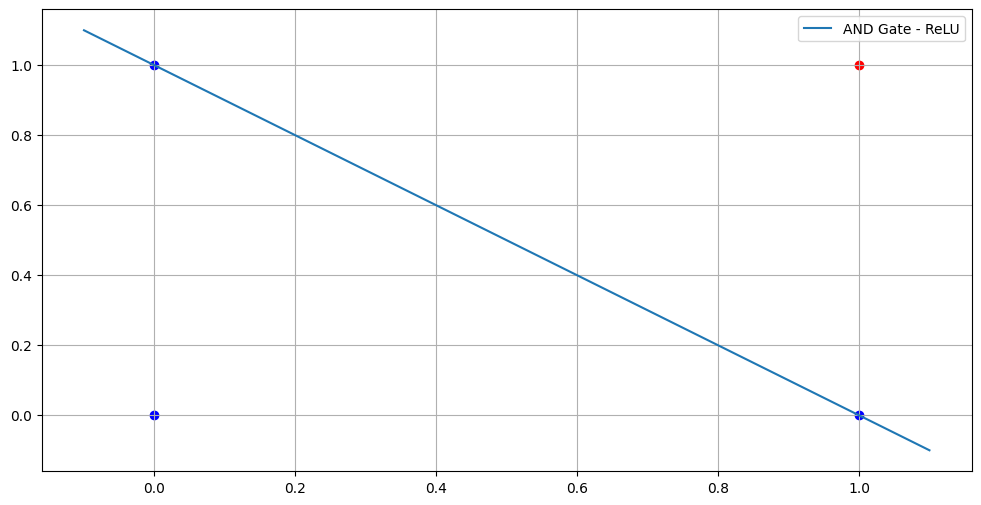

Training for AND gate with Sigmoid...


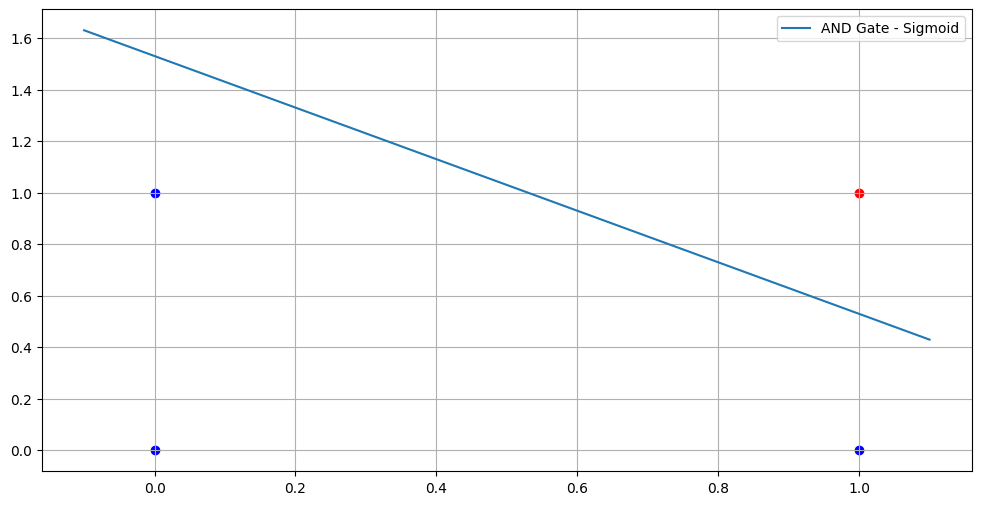

Training for NOR gate with ReLU...


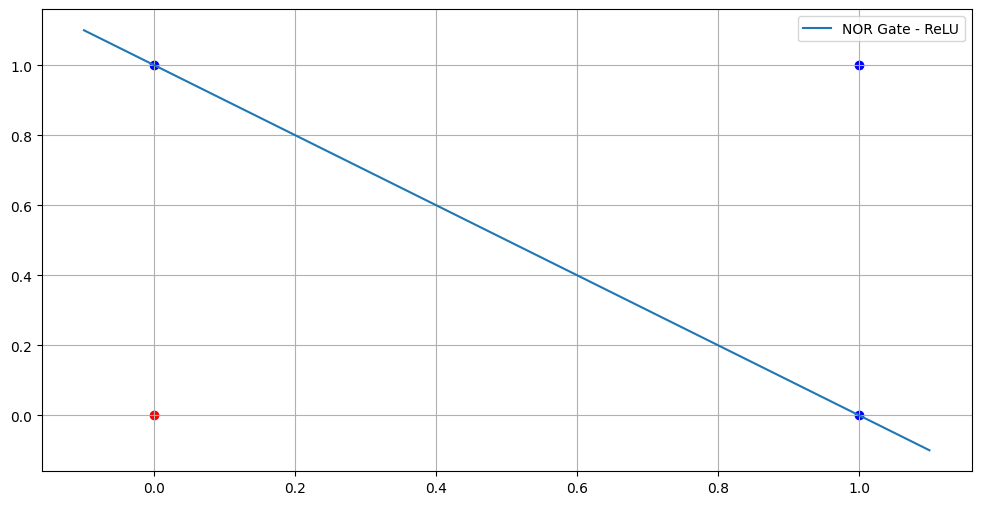

Training for NOR gate with Sigmoid...


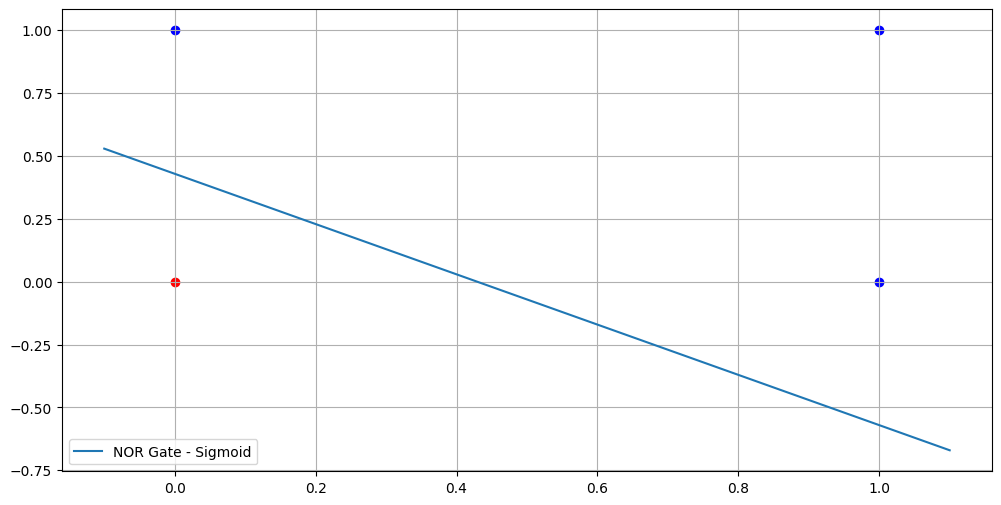

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def train_perceptron(inputs, outputs, activation, learning_rate=0.1, max_iterations=1000):
    np.random.seed(42)
    weights = np.random.rand(2)
    bias = np.random.rand(1)
    
    for _ in range(max_iterations):
        for i in range(len(inputs)):
            linear_combination = np.dot(inputs[i], weights) + bias
            prediction = activation(linear_combination)
            error = outputs[i] - prediction
            weights += learning_rate * error * inputs[i]
            bias += learning_rate * error
    
    return weights, bias

def plot_decision_boundary(inputs, outputs, weights, bias, title):
    plt.figure(figsize=(12, 6))
    
    for i in range(len(inputs)):
        if outputs[i] == 0:
            plt.scatter(inputs[i][0], inputs[i][1], color='blue')
        else:
            plt.scatter(inputs[i][0], inputs[i][1], color='red')
    
    x_values = np.linspace(-0.1, 1.1, 100)
    y_values = -(weights[0] * x_values + bias) / weights[1]
    plt.plot(x_values, y_values, label=title)
    plt.legend()
    plt.grid(True)
    plt.show()

def main():
    inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    gates = {
        "OR": np.array([0, 1, 1, 1]),
        "AND": np.array([0, 0, 0, 1]),
        "NOR": np.array([1, 0, 0, 0])
    }
    
    for gate, outputs in gates.items():
        print(f"Training for {gate} gate with ReLU...")
        weights, bias = train_perceptron(inputs, outputs, relu)
        plot_decision_boundary(inputs, outputs, weights, bias, f"{gate} Gate - ReLU")
        
        print(f"Training for {gate} gate with Sigmoid...")
        weights, bias = train_perceptron(inputs, outputs, sigmoid)
        plot_decision_boundary(inputs, outputs, weights, bias, f"{gate} Gate - Sigmoid")

if __name__ == "__main__":
    main()
